In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras import layers



In [24]:
data = pd.read_csv('diabetes2.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
x = data[['Glucose','Age','Pregnancies','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].values
y = data['Outcome'].values

print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [26]:
# Feature Scaling using z score

x_scaled  = x-np.mean(x,axis=0)
x = x_scaled / np.std(x_scaled , axis= 0)

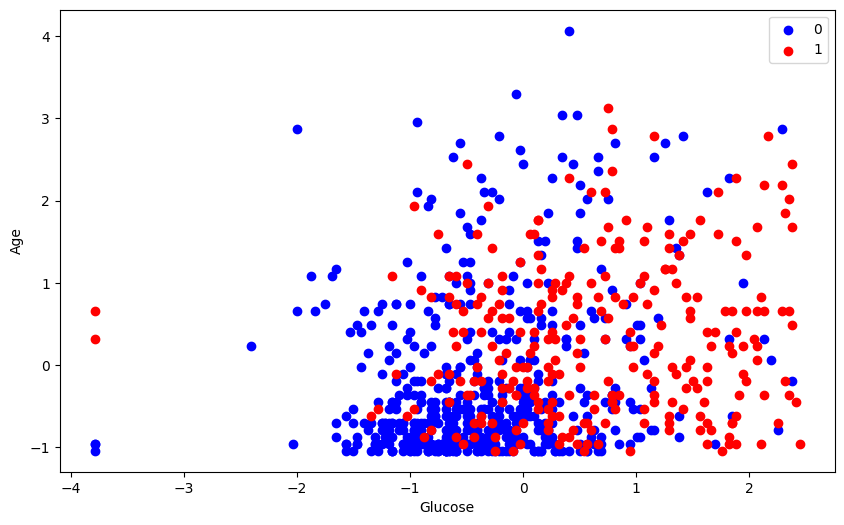

In [27]:
plt.figure(figsize=(10,6))
plt.scatter( x[ y == 0][:,0] , x[ y== 0 ][:,1] , color ='b' , label = '0')
plt.scatter( x[ y == 1][:,0] , x[ y== 1 ][:,1] , color ='r' , label = '1')
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.legend()

In [28]:

x_train , x_test ,y_train,y_test = train_test_split( x , y , test_size=0.2 , random_state=42 )
print(len(x_train))
print(len(x_test))

614
154


In [29]:
input_dim = x_train.shape[1]

model = Sequential()
model.add(layers.Dense( 4 , input_dim = input_dim , activation='relu' , name = 'layer1'))
model.add(layers.Dense( 3, activation = 'relu' , name = 'layer2'))
model.add(layers.Dense(1 , activation= 'sigmoid' , name = 'Output_layer'))

model.summary()

c:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                  │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 3)              │            15 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55 (220.00 B)

 Trainable params: 55 (220.00 B)

 Non-trainable params: 0 (0.00 B)

In [36]:
#compile the model
import tensorflow as tf

#model.compile(loss='binary_crossentropy', optimizer='sgd',  metrics=['accuracy'])

model.compile(loss='binary_crossentropy', optimizer='sgd',  metrics=['accuracy', tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])

In [37]:
#Training the model

model.fit(x_train, y_train, epochs=100, verbose=2, batch_size=32, validation_split= 0.1)

Epoch 1/100
18/18 - 4s - 241ms/step - accuracy: 0.7609 - loss: 0.5267 - precision: 0.7295 - recall: 0.4734 - val_accuracy: 0.7097 - val_loss: 0.5320 - val_precision: 0.6842 - val_recall: 0.5200
Epoch 2/100
18/18 - 0s - 11ms/step - accuracy: 0.7591 - loss: 0.5263 - precision: 0.7236 - recall: 0.4734 - val_accuracy: 0.7097 - val_loss: 0.5319 - val_precision: 0.6842 - val_recall: 0.5200
Epoch 3/100
18/18 - 0s - 14ms/step - accuracy: 0.7591 - loss: 0.5257 - precision: 0.7236 - recall: 0.4734 - val_accuracy: 0.7097 - val_loss: 0.5317 - val_precision: 0.6842 - val_recall: 0.5200
Epoch 4/100
18/18 - 0s - 14ms/step - accuracy: 0.7572 - loss: 0.5253 - precision: 0.7177 - recall: 0.4734 - val_accuracy: 0.7258 - val_loss: 0.5320 - val_precision: 0.7222 - val_recall: 0.5200
Epoch 5/100
18/18 - 0s - 8ms/step - accuracy: 0.7572 - loss: 0.5248 - precision: 0.7177 - recall: 0.4734 - val_accuracy: 0.7258 - val_loss: 0.5318 - val_precision: 0.7222 - val_recall: 0.5200
Epoch 6/100
18/18 - 0s - 8ms/step -

In [40]:
## Evaluate on test data
loss, accuracy, precision, recall= model.evaluate(x_test, y_test, batch_size=1)
print("Testing Loss: ",loss)
print("Testing Accuracy: ",accuracy)
print("Testing Precision: ",precision)
print("Testing Recall: ",recall)

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7917 - loss: 0.5086 - precision: 0.6252 - recall: 0.5452     
Testing Loss:  0.49981629848480225
Testing Accuracy:  0.798701286315918
Testing Precision:  0.760869562625885
Testing Recall:  0.6363636255264282


In [41]:
### Evaluate on test data
y_pred = model.predict(x_test, verbose=1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [43]:
from sklearn import metrics

CM = metrics.confusion_matrix(y_test, y_pred.round())
print('Confusion Matrix is : \n', CM)
print('--------------------------------')
ACC = metrics.accuracy_score(y_test, y_pred.round())
print('Accuracy is : \n', ACC)
print('--------------------------------')
Rec = metrics.recall_score(y_test, y_pred.round())
print('Recall is : \n', Rec)
print('--------------------------------')
Prec = metrics.precision_score(y_test, y_pred.round())
print('Precsion is : \n', Prec)
print('--------------------------------')
F1 = metrics.f1_score(y_test, y_pred.round())
print('F1 score is : \n', F1)
print('--------------------------------')

Confusion Matrix is : 
 [[88 11]
 [20 35]]
--------------------------------
Accuracy is : 
 0.7987012987012987
--------------------------------
Recall is : 
 0.6363636363636364
--------------------------------
Precsion is : 
 0.7608695652173914
--------------------------------
F1 score is : 
 0.693069306930693
--------------------------------
